In [22]:
import sympy
from sympy import S, solve, Matrix, diff, plot, solve
from sympy import log as Log
from sympy.plotting import plot3d
from sympy.geometry import Point
%matplotlib inline
%matplotlib widget

## Занятие 16
## Математический анализ
## Градиент функции нескольких переменных, производная по направлению, касательная плоскость.
Градиент функции $z=f(x,y)$ - вектор $grad z$:
$$
grad\ z=\frac{\partial z}{\partial x} i+\frac{\partial z}{\partial y} j,
$$
где $i$, $j$ - орты.
Градиент функции трех переменных  $u=f(x,y,z)$ - вектор $grad u$:
$$
grad\ z=\frac{\partial u}{\partial x} i+\frac{\partial u}{\partial y} j+\frac{\partial u}{\partial z} k,
$$
где $i$, $j$, $k$ - орты.

Производная  функции $u=f(x,y,z)$ по направлению $l=\bar{PP_1}$ это $\frac{\partial u}{\partial l}$:
$$
\frac{\partial u}{\partial l}=\lim_{P_1\to P}\frac{f(P_1)-f(P)}{PP_1}=l\cdot grad\ u,
$$
где $l$ - единичный вектор заданного направления.
### Пример 1
Найти градиент функции $\ln(x^2+(y-2)^2+xy)$ в произвольной точке и в точке $(0, 1)$. Найти производную в точке $(0, 1)$ по направлению вектора $(-3/5, 4/5)$.

Вычисляем частные производные по $x$ и $y$, составляем градиент:

In [23]:
from sympy.abc import x, y
def f(x, y):
    return Log(-x**2 + 3*(y - 5)**2 - 6*x*y)
def grad_f(f, *var):
    return Matrix([f(*var).diff(variable) for variable in var])
grad_f(f, x, y)

Matrix([
[     (-2*x - 6*y)/(-x**2 - 6*x*y + 3*(y - 5)**2)],
[(-6*x + 6*y - 30)/(-x**2 - 6*x*y + 3*(y - 5)**2)]])

Вычислим градиент в заданной точке, найдем скалярное произведение градиента на единичный вектор заданного направления $(-3/5, 4/5)$:

In [24]:
def grad_f_point(f, var_dict):
    return grad_f(f, *var_dict.keys()).subs(var_dict)
grad1 = grad_f_point(f, {x: 0, y: 1})
display(grad1, grad1.dot(Matrix((-S(3)/5, S(4)/5))))

Matrix([
[-1/8],
[-1/2]])

-13/40

### Касательная плоскость и нормаль к поверхности 
#### Касательная плоскость  
к поверхности в точке $М$ (точке касания) называется плоскость, в которой лежат все касательные 
в точке М к различным кривым, проведенным на поверхности через эту точку.

#### Нормаль
к поверхности - прямая, перпендикулярная касательной плоскости в точке касания.

Пусть уравнение поверхности $z = f(x, y)$, тогда 
#### уравнение касательной плоскости 
в точке $M(x_0, y_0, z_0)$ поверхности
$$
z - z_0 = f'_x(x_0, y_0)(x - x_0) + f'_y(x_0, y_0)(y - y_0)
$$

#### Уравнения нормали:
$$
\frac{x - x_0}{f'_x(x_0,y_0)} = \frac{y - y_0}{f'_y(x_0, y_0)} = \frac{z - z_0}{-1}
$$

### Пример 2.
Поверхность задана уравнением $z = x^2 + y^2$. Составить уравнение касательной плоскости и нормали в точке $М(1, -2, 5)$.

In [25]:
from sympy.abc import z
M = Point(1, -2, 5)
dictM = {x: M.x, y: M.y, z: M.z}
f = x**2 + y**2
fdx, fdy = [f.diff(p).subs(dictM) for p in [x, y]]
display(fdx, fdy)
planeM = sympy.Eq(z - M.z, fdx*(x - M.x) + fdy*(y - M.y))
norm_line = sympy.Eq(sympy.Eq((x - M.x)/fdx, (y - M.y)/fdy, evaluate=False), 
                     (z - M.z)/(-1), evaluate=False)
display(planeM, norm_line)

2

-4

Eq(z - 5, 2*x - 4*y - 10)

Eq(Eq(x/2 - 1/2, -y/4 - 1/2), 5 - z)

Построим на одном графике поверхность и касательную плоскость.

Представим для этого уравнение плоскости как выражение для $z$:

Eq(z, 2*x - 4*y - 5)

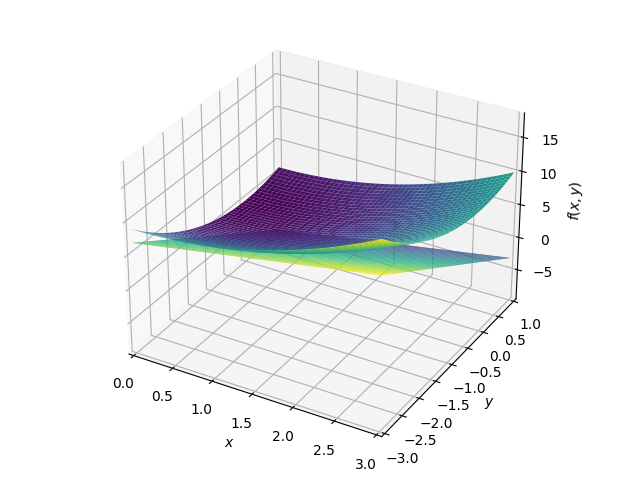

In [26]:
zz= solve(planeM, z)[0]
display(sympy.Eq(z, zz))
plot3d(zz, f, (x, 0, 3), (y, -3, 1))

## Неявно заданная функция 
#### уравнение касательной плоскости 
в точке $M(x_0,y_0,z_0)$ поверхности $F(x,y,z)=0$
$$
F'_x(x_0,y_0,z_0)(x-x_0)+F'_y(x_0,y_0,z_0)(y-y_0)+F'_z(x_0,y_0,z_0)(z-z_0)=0
$$

#### Уравнения нормали:
$$
\frac{x-x_0}{F'_x(x_0,y_0,z_0)}=\frac{y-y_0}{F'_y(x_0,y_0,z_0)}=\frac{z-z_0}{F'_z(x_0,y_0,z_0)}
$$


### Пример 3.
Поверхность задана уравнением $\frac{x^2}{16}+\frac{y^2}{9}-\frac{z^2}{8}=0$. Составить уравнение касательной плоскости и нормали в точке М(4,3,4).

In [27]:
M = Point(4, 3, 4)
dictM = {x: M.x, y: M.y, z: M.z}
F = x**2/16 + y**2/9 - z**2/8
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
display(Fdx, Fdy, Fdz)
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False), 
                   (z - M.z)/Fdz, evaluate=False)
display(planeM, norm_line)

1/2

2/3

-1

Eq(x/2 + 2*y/3 - z, 0)

Eq(Eq(2*x - 8, 3*y/2 - 9/2), 4 - z)

Изобразим на графике:

-sqrt(18*x**2 + 32*y**2)/6

sqrt(18*x**2 + 32*y**2)/6

x/2 + 2*y/3

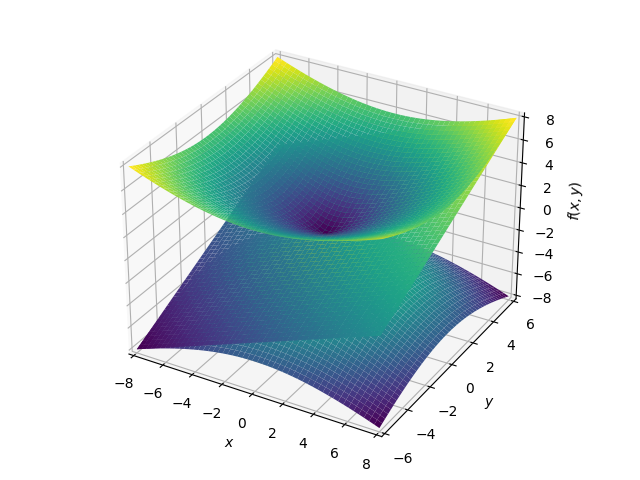

In [28]:
zz1, zz2 = list(solve(F, z))
zz3 = M.z - 1/Fdz*(Fdx*(x - M.x) + Fdy*(y - M.y)) #это выразили z из уравнения касательной плоскости
display(zz1, zz2, zz3)
plot3d(zz1, zz2, zz3, (x, -8, 8), (y, -6, 6))